<a href="https://colab.research.google.com/github/s2tandu0p/lol_win_predict/blob/main/Shaohua_Guan_Project_2_Part_4_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. LOAD DATA

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd


In [100]:
ytrain_data = pd.read_csv('/content/drive/MyDrive/Personal/Dojo/data/lol win predict/lol-prediction/lol.y_train.csv')
xtrain_data = pd.read_csv('/content/drive/MyDrive/Personal/Dojo/data/lol win predict/lol-prediction/lol.x_train.csv')



In [101]:
ytrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  180000 non-null  int64
 1   blueWins    180000 non-null  int64
dtypes: int64(2)
memory usage: 2.7 MB


In [102]:
xtrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               180000 non-null  int64  
 1   gameDuraton              180000 non-null  int64  
 2   blueFirstBlood           180000 non-null  int64  
 3   blueFirstTower           180000 non-null  int64  
 4   blueFirstBaron           180000 non-null  int64  
 5   blueFirstDragon          180000 non-null  int64  
 6   blueFirstInhibitor       180000 non-null  int64  
 7   blueDragonKills          180000 non-null  int64  
 8   blueBaronKills           180000 non-null  int64  
 9   blueTowerKills           180000 non-null  int64  
 10  blueInhibitorKills       180000 non-null  int64  
 11  blueWardPlaced           180000 non-null  int64  
 12  blueWardkills            180000 non-null  int64  
 13  blueKills                180000 non-null  int64  
 14  blue

In [103]:
df = pd.merge(xtrain_data, ytrain_data, on='Unnamed: 0', how='inner')

In [104]:
df.head()

,Unnamed: 0,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank_Challenger,Rank_GrandMaster,Rank_Master,blueWins
0,0,1906,0,1,1,1,1,3,2,9,2,62,45,43,26,74,135355,68241,555,81,16.2,238,12,60207,95456,0,0,0,1,0,2,0,84,29,26,43,38,100705,56484,677,74,14.8,134,9,52184,15764,0,1,0,1
1,1,1454,0,1,1,1,0,3,1,4,0,48,17,40,25,53,75736,52100,418,66,13.2,149,7,27543,57961,0,0,0,0,0,2,0,49,13,25,40,35,70660,45894,502,61,12.2,123,7,13236,15042,0,0,1,1
2,2,1449,1,1,0,0,0,3,0,4,0,69,25,20,21,29,71486,46522,515,63,12.6,191,4,27921,58575,1,1,1,1,1,6,1,71,23,21,20,39,58082,46759,556,67,13.4,105,5,13959,46455,0,1,0,0
3,3,1832,0,0,0,0,0,0,0,3,0,59,20,28,48,34,74430,55078,613,73,14.6,128,5,23641,23832,0,1,1,4,0,10,3,67,17,48,28,55,113195,66805,592,79,15.8,239,13,38586,80341,0,0,1,0
4,4,1098,0,0,0,0,0,0,0,1,0,0,0,41,58,83,96554,58327,235,84,16.8,0,10,26543,2262,0,0,1,0,0,4,2,0,0,58,41,165,126815,63002,215,89,17.8,0,18,24834,9434,0,0,1,0


#1. PREPROCESSING

1.1 drop Unnamed: 0 and gameDuration

In [105]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = 'gameDuraton', inplace = True)

In [106]:
df.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank_Challenger,Rank_GrandMaster,Rank_Master,blueWins
0,0,1,1,1,1,3,2,9,2,62,45,43,26,74,135355,68241,555,81,16.2,238,12,60207,95456,0,0,0,1,0,2,0,84,29,26,43,38,100705,56484,677,74,14.8,134,9,52184,15764,0,1,0,1
1,0,1,1,1,0,3,1,4,0,48,17,40,25,53,75736,52100,418,66,13.2,149,7,27543,57961,0,0,0,0,0,2,0,49,13,25,40,35,70660,45894,502,61,12.2,123,7,13236,15042,0,0,1,1
2,1,1,0,0,0,3,0,4,0,69,25,20,21,29,71486,46522,515,63,12.6,191,4,27921,58575,1,1,1,1,1,6,1,71,23,21,20,39,58082,46759,556,67,13.4,105,5,13959,46455,0,1,0,0
3,0,0,0,0,0,0,0,3,0,59,20,28,48,34,74430,55078,613,73,14.6,128,5,23641,23832,0,1,1,4,0,10,3,67,17,48,28,55,113195,66805,592,79,15.8,239,13,38586,80341,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,41,58,83,96554,58327,235,84,16.8,0,10,26543,2262,0,0,1,0,0,4,2,0,0,58,41,165,126815,63002,215,89,17.8,0,18,24834,9434,0,0,1,0


1.2 drop 

redFirstBaron, 

redFirstDragon, 

redFirstInhibitor

the reason for dropping those columns is that if the blue team has first Baron, first Dragon, or first Inhibitor, the red team does not have it. 

hence the columns mentioned above do not provide more information to our model.

hence they are dropped.

In [107]:
#df.drop(['redFirstBaron', 'redFirstDragon', 'redFirstInhibitor'], axis = 1, inplace = True)

In [108]:
#df.describe()

1.3 Rank_Challenger, Rank_GrandMaster, Rank_Master

about 54% of the games are Rank_Master

about 33% of the games are Rank_GrandMaster

about 13% of the games are Rank_Challenger

In League of Legends, of all competitive ranked players

.12% are Master tier

.029% are Grandmaster tier

.013% are Challenger tier
source: https://support-leagueoflegends.riotgames.com/hc/en-us/articles/4405776545427-Master-Grandmaster-and-Challenger-The-Apex-Tiers

in our data, 13% of 180,000 data points is 23,400

which i believe is enough for this project

hence, i'm going to drop the data points for 

Rank_Master and Rank_GrandMaster

Advantages of doing so:
1. less data that will result in a faster calculation
2. the model will be specifically focusing on Rank_Challenger games

In [109]:
df_Challenger = df[df.Rank_Challenger == 1]

In [110]:
df_Challenger.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank_Challenger,Rank_GrandMaster,Rank_Master,blueWins
8,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,0,0,0,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1,0,0,1
10,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,0,0,1,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,1,0,0,0
13,0,0,0,1,0,4,1,5,0,101,34,38,27,93,143432,71249,747,85,17.0,236,6,45544,60555,1,0,1,2,1,7,1,91,42,26,38,63,114175,63252,690,78,15.6,198,7,48050,72472,1,0,0,1
21,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,0,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1,0,0,1
22,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,0,0,0,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1,0,0,1


In [111]:
# since i've created df_Challenger that's only for Rank_Challenger games
# i can drop the columns Rank_Challenger, Rank_GrandMaster, Rank_Master

df_Challenger.drop(['Rank_Challenger', 'Rank_GrandMaster', 'Rank_Master'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [112]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24195 entries, 8 to 179994
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           24195 non-null  int64  
 1   blueFirstTower           24195 non-null  int64  
 2   blueFirstBaron           24195 non-null  int64  
 3   blueFirstDragon          24195 non-null  int64  
 4   blueFirstInhibitor       24195 non-null  int64  
 5   blueDragonKills          24195 non-null  int64  
 6   blueBaronKills           24195 non-null  int64  
 7   blueTowerKills           24195 non-null  int64  
 8   blueInhibitorKills       24195 non-null  int64  
 9   blueWardPlaced           24195 non-null  int64  
 10  blueWardkills            24195 non-null  int64  
 11  blueKills                24195 non-null  int64  
 12  blueDeath                24195 non-null  int64  
 13  blueAssist               24195 non-null  int64  
 14  blueChampionDamageDea

In [113]:
# drop duplicates
df_Challenger.drop_duplicates()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
8,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,0,0,0,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1
10,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,0,0,1,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,0
13,0,0,0,1,0,4,1,5,0,101,34,38,27,93,143432,71249,747,85,17.0,236,6,45544,60555,1,0,1,2,1,7,1,91,42,26,38,63,114175,63252,690,78,15.6,198,7,48050,72472,1
21,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,0,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1
22,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,0,0,0,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179947,1,0,1,0,1,2,2,11,3,81,24,35,16,56,79812,61965,578,77,15.4,238,5,58102,96570,0,1,0,3,0,2,0,51,19,16,35,30,69426,50264,735,70,14.0,162,4,18722,32282,1
179961,0,1,0,1,0,2,0,4,0,62,16,31,31,39,66318,52468,596,64,12.8,130,7,28343,24799,1,0,1,1,1,10,2,50,15,28,31,60,84390,55561,546,73,14.6,164,7,40564,53720,0
179975,0,0,0,0,0,0,0,1,0,41,15,15,32,22,42869,34883,449,54,10.8,77,4,7609,10125,0,1,0,2,0,3,0,51,12,32,15,57,53370,43701,459,63,12.6,111,5,19354,31237,0
179980,0,1,0,0,1,1,0,6,1,53,12,24,9,29,56082,41226,486,58,11.6,98,4,12489,32364,0,1,0,2,0,0,0,46,13,9,24,15,39449,30792,418,48,9.6,72,3,17925,22116,1


In [114]:
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000
mean,0.504071,0.525770,0.243852,0.408514,0.367431,1.389543,0.306262,4.394668,0.618971,58.579211,22.315230,24.163505,24.138128,39.940070,69653.715974,48118.702955,520.104774,64.983468,12.996694,129.467452,5.551643,24999.932011,38358.943501,0.266129,0.501261,0.347138,1.560942,0.335565,4.248068,0.581070,58.756520,21.901343,24.058442,24.242529,39.709527,69381.972928,48152.048150,526.060012,65.171110,13.034222,130.387435,5.529738,25484.031907,37589.471378,0.501095
std,0.499994,0.499346,0.429413,0.491569,0.482115,1.246961,0.535374,3.327041,0.900486,31.292619,15.482489,12.920780,13.030776,27.736516,35716.870768,15463.874503,175.735908,14.062367,2.812473,64.640878,3.487660,15054.083404,26319.841931,0.441942,0.500009,0.476070,1.298776,0.558718,3.322484,0.867462,31.586971,15.263579,13.012561,12.940020,27.718175,35812.626815,15624.681947,178.830590,14.105862,2.821172,64.492855,3.486564,15384.278576,26479.789833,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,43064.000000,37100.500000,409.000000,56.000000,11.200000,90.000000,3.000000,14069.000000,15572.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,10.000000,15.000000,15.000000,20.000000,42973.000000,37042.000000,412.000000,56.000000,11.200000,91.000000,3.000000,14463.500000,14481.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,36.000000,64922.000000,48046.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21960.000000,34954.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64495.000000,47983.000000,540.000000,66.000000,13.200000,132.000000,5.000000,22331.000000,33279.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,90141.500000,58633.000000,639.000000,75.000000,15.000000,173.000000,7.000000,32667.500000,57759.000000,1.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,79.000000,31.000000,32.000000,32.000000,53.000000,89764.500000,58667.500000,648.000000,75.000000,15.000000,174.000000,7.000000,33169.000000,57692.500000,

In [115]:
# from .describe() i can tell the data is balanced
# below is the value_counts()
df_Challenger['blueWins'].value_counts()

1    12124
0    12071
Name: blueWins, dtype: int64

1.4 blueTotalLevel

in League of Legends, the max level a player could get in every game is 18 in most game modes

there are 5 players on either blue or red side

that the max level for each team is 18x5=90

from the .describe() above we can see the max for blueTotalLevel is 123

hence i'm going to drop the rows where the blueTotalLevel is more than 90

then i'm going to check if the processed data set has redTotalLevel more than 90 and drop those rows as well.

In [116]:
df_Challenger = df_Challenger[df_Challenger.blueTotalLevel <= 90]

In [117]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24100 entries, 8 to 179994
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           24100 non-null  int64  
 1   blueFirstTower           24100 non-null  int64  
 2   blueFirstBaron           24100 non-null  int64  
 3   blueFirstDragon          24100 non-null  int64  
 4   blueFirstInhibitor       24100 non-null  int64  
 5   blueDragonKills          24100 non-null  int64  
 6   blueBaronKills           24100 non-null  int64  
 7   blueTowerKills           24100 non-null  int64  
 8   blueInhibitorKills       24100 non-null  int64  
 9   blueWardPlaced           24100 non-null  int64  
 10  blueWardkills            24100 non-null  int64  
 11  blueKills                24100 non-null  int64  
 12  blueDeath                24100 non-null  int64  
 13  blueAssist               24100 non-null  int64  
 14  blueChampionDamageDea

In [118]:
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000
mean,0.504232,0.526058,0.242946,0.408050,0.366971,1.385021,0.304938,4.382448,0.614855,58.593195,22.377303,24.002116,23.978714,39.830747,69267.265685,47933.289170,520.221369,64.843900,12.968780,129.603444,5.512573,24932.706224,38191.579087,0.265685,0.501369,0.346515,1.558506,0.334979,4.238257,0.578216,58.754564,21.967510,23.899378,24.080373,39.608672,69001.325062,47969.394813,526.189876,65.038963,13.007793,130.502075,5.493071,25428.508838,37443.032863,0.500705
std,0.499992,0.499331,0.428872,0.491483,0.481988,1.244539,0.534700,3.323580,0.895305,31.333265,15.475538,12.666919,12.778826,27.711794,35195.207403,15200.262512,176.020502,13.903407,2.780681,64.688158,3.430912,14981.052370,26175.947914,0.441706,0.500008,0.475869,1.297207,0.558340,3.320407,0.863994,31.622247,15.253091,12.761446,12.683574,27.687401,35275.911157,15364.027460,179.100100,13.958271,2.791654,64.536717,3.434531,15312.357059,26341.360559,0.500010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,43003.500000,37049.750000,408.000000,56.000000,11.200000,90.000000,3.000000,14032.750000,15487.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,42864.000000,36994.000000,411.000000,56.000000,11.200000,91.000000,3.000000,14446.000000,14396.750000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,35.000000,64774.500000,47974.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21911.000000,34767.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64328.000000,47895.000000,541.000000,66.000000,13.200000,132.000000,5.000000,22289.500000,33122.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,89770.750000,58511.500000,639.000000,75.000000,15.000000,173.000000,7.000000,32597.250000,57605.000000,1.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,79.000000,31.000000,32.000000,32.000000,53.000000,89396.500000,58517.500000,648.000000,75.000000,15.000000,174.000000,7.000000,33120.250000,57561.000000,

1.5 redTotalLevel

i see that the max for redTotalLevel is 108
repeat the same steps we did for blueTotalLevel

In [119]:
df_Challenger = df_Challenger[df_Challenger.redTotalLevel <= 90]
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.00000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000
mean,0.504382,0.526106,0.242949,0.408224,0.366937,1.384881,0.304964,4.380893,0.614455,58.602451,22.396719,23.974413,23.933209,39.816282,69207.003946,47897.798962,520.312939,64.822056,12.964411,129.672482,5.506625,24930.996469,38175.251589,0.265337,0.501101,0.346251,1.557466,0.334579,4.233396,0.576739,58.760789,21.986044,23.854206,24.052669,39.584922,68914.575244,47925.16270,526.258442,65.008100,13.001620,130.528266,5.482326,25420.427871,37398.415202,0.501101
std,0.499991,0.499328,0.428874,0.491515,0.481979,1.244640,0.534704,3.323851,0.895081,31.344882,15.470720,12.641651,12.702043,27.717157,35158.982699,15167.464719,176.083099,13.893762,2.778752,64.679994,3.425950,14981.672817,26171.243284,0.441522,0.500009,0.475784,1.296932,0.558230,3.317999,0.862793,31.634590,15.249618,12.685890,12.658347,27.684680,35181.521696,15309.47715,179.173491,13.932013,2.786403,64.556594,3.417887,15311.820219,26305.846853,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.00000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,42995.500000,37036.000000,408.000000,56.000000,11.200000,90.000000,3.000000,14031.000000,15469.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,42848.000000,36980.00000,411.000000,56.000000,11.200000,91.000000,3.000000,14440.000000,14381.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,35.000000,64722.000000,47958.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21907.000000,34740.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64278.000000,47879.00000,541.000000,66.000000,13.200000,132.000000,5.000000,22280.000000,33097.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,89711.000000,58468.000000,639.000000,75.000000,15.000000,173.000000,7.000000,32600.500000,57585.000000,1.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,79.000000,31.000000,32.000000,32.000000,53.000000,89323.000000,58487.50000,648.000000,75.000000,15.000000,174.000000,7.000000,33114.000000,57514.500000,1.00000

In [120]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24075 entries, 8 to 179994
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           24075 non-null  int64  
 1   blueFirstTower           24075 non-null  int64  
 2   blueFirstBaron           24075 non-null  int64  
 3   blueFirstDragon          24075 non-null  int64  
 4   blueFirstInhibitor       24075 non-null  int64  
 5   blueDragonKills          24075 non-null  int64  
 6   blueBaronKills           24075 non-null  int64  
 7   blueTowerKills           24075 non-null  int64  
 8   blueInhibitorKills       24075 non-null  int64  
 9   blueWardPlaced           24075 non-null  int64  
 10  blueWardkills            24075 non-null  int64  
 11  blueKills                24075 non-null  int64  
 12  blueDeath                24075 non-null  int64  
 13  blueAssist               24075 non-null  int64  
 14  blueChampionDamageDea

1.6 Remove Outliers

In [121]:
# blueWardPlaced 
df_Challenger = df_Challenger[df_Challenger.blueWardPlaced < 100]
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000
mean,0.506131,0.524365,0.217379,0.402517,0.351812,1.275617,0.250034,4.153401,0.569513,52.511643,19.807101,23.355762,23.352455,38.382584,65261.474349,45912.495706,494.171681,63.241078,12.648216,120.825977,5.348551,23143.105498,35157.074174,0.242227,0.497221,0.335737,1.452900,0.280990,4.033206,0.537271,53.717356,19.072016,23.272080,23.435907,38.280807,65033.186240,45972.076655,499.479217,63.460433,12.692087,121.934460,5.337850,23601.818720,34563.235797,0.499058
std,0.499974,0.499417,0.412472,0.490416,0.477547,1.191730,0.476665,3.299865,0.856400,25.928590,13.299728,12.830335,12.885153,28.192557,33439.287833,14287.631479,161.317281,13.548095,2.709619,60.010584,3.469983,13624.755461,24509.307855,0.428441,0.500004,0.472258,1.257002,0.501463,3.302949,0.824121,28.016826,12.393743,12.867508,12.849093,28.145418,33515.948732,14468.092036,163.901689,13.618080,2.723616,60.385491,3.462728,13949.296421,24848.656049,0.500011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,36.000000,10.000000,14.000000,14.000000,19.000000,40860.000000,35865.000000,393.000000,55.000000,11.000000,85.000000,3.000000,13324.000000,13775.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,36.000000,10.000000,14.000000,14.000000,19.000000,40796.000000,35821.000000,396.000000,55.000000,11.000000,86.000000,3.000000,13688.000000,12657.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,54.000000,19.000000,22.000000,22.000000,33.000000,60830.000000,46101.000000,515.000000,64.000000,12.800000,124.000000,5.000000,20507.000000,31368.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,19.000000,22.000000,22.000000,33.000000,60615.000000,45967.000000,521.000000,64.000000,12.800000,125.000000,5.000000,20832.000000,29758.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,31.000000,31.000000,51.000000,83586.000000,55781.000000,607.000000,72.000000,14.400000,162.000000,7.000000,29943.000000,53535.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,73.000000,28.000000,31.000000,31.000000,50.000000,83784.000000,55971.000000,615.000000,73.000000,14.600000,163.000000,7.000000,30696.000000,53849.000000,

In [122]:
# blueKill
df_Challenger = df_Challenger[df_Challenger.blueKills < 40]
df_Challenger.describe()


,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000
mean,0.500664,0.513033,0.209598,0.414955,0.311970,1.278238,0.236891,3.975672,0.471277,54.531228,20.638659,20.467904,21.549065,32.271645,58785.058111,43605.834356,502.655985,61.197179,12.239436,124.808239,4.610191,21839.414597,34968.998722,0.257385,0.526832,0.343453,1.534141,0.295155,4.146939,0.520546,55.840744,20.018042,21.481192,20.541807,34.164060,59758.034141,44217.613104,508.799857,61.801850,12.360370,127.731780,4.877645,22832.471890,35969.763876,0.471328
std,0.500012,0.499843,0.407032,0.492727,0.463309,1.161379,0.462496,3.283771,0.786266,23.711966,12.728342,9.580598,11.174714,19.359344,26280.637159,12764.111051,155.464062,12.462157,2.492431,53.847010,2.611265,12529.713770,23663.376965,0.437205,0.499292,0.474873,1.245912,0.507671,3.367776,0.804512,25.864428,11.913554,11.173823,9.587024,22.575098,27825.598750,13451.148494,157.040456,12.859783,2.571957,54.949615,2.968246,13441.032535,24651.340103,0.499190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,38849.500000,34796.000000,411.000000,54.000000,10.800000,91.000000,3.000000,12784.000000,15219.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,38744.250000,34804.250000,415.000000,54.000000,10.800000,92.000000,3.000000,13185.250000,14761.750000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,20.000000,21.000000,21.000000,30.000000,57020.000000,44247.000000,520.000000,62.000000,12.400000,126.000000,5.000000,19529.500000,31411.500000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,56.000000,19.000000,21.000000,21.000000,31.000000,57020.500000,44438.000000,527.000000,63.000000,12.600000,128.000000,5.000000,20176.000000,31688.500000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,28.000000,29.000000,45.000000,76231.750000,52858.000000,608.000000,70.000000,14.000000,161.000000,6.000000,28283.500000,52442.250000,1.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,73.000000,28.000000,29.000000,28.000000,47.000000,77982.750000,54110.500000,616.000000,71.000000,14.200000,165.000000,7.000000,29821.750000,55199.500000,1.

In [123]:
# blueDeath
df_Challenger = df_Challenger[df_Challenger.blueDeath < 40]
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000
mean,0.510131,0.528486,0.216558,0.425980,0.327505,1.314107,0.243791,4.091776,0.491394,54.862473,20.843845,20.043845,19.988943,31.386057,56991.035131,43023.643736,504.620697,60.592048,12.118410,126.483224,4.523203,21603.349619,35779.500436,0.243627,0.527397,0.309096,1.500654,0.275436,3.938072,0.456917,55.993682,20.091667,19.922386,20.111329,31.303976,56767.372222,43039.032516,509.813399,60.807625,12.161525,127.408279,4.505610,22017.803704,34914.783497,0.499292
std,0.499911,0.499201,0.411910,0.494504,0.469316,1.163649,0.467169,3.316669,0.797370,22.958875,12.563228,9.553042,9.559446,18.858566,25371.294321,12737.383471,152.180852,12.396640,2.479328,52.094208,2.595484,12453.701797,23711.928376,0.429282,0.499262,0.462133,1.222731,0.490229,3.304083,0.760923,25.080020,11.670608,9.562134,9.553980,18.945900,25444.817367,12891.982044,154.418896,12.501418,2.500284,52.272526,2.596841,12799.812743,23989.983356,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,37736.750000,34305.750000,414.000000,53.000000,10.600000,92.000000,3.000000,12577.000000,15902.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,12.000000,13.000000,17.000000,37649.000000,34244.500000,417.000000,53.000000,10.600000,93.000000,3.000000,12851.000000,14679.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,20.000000,20.000000,20.000000,29.000000,55175.500000,43578.000000,520.000000,62.000000,12.400000,126.000000,4.000000,19261.500000,32364.500000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,19.000000,20.000000,20.000000,29.000000,54573.500000,43339.000000,525.000000,62.000000,12.400000,127.000000,4.000000,19479.500000,30471.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,27.000000,27.000000,44.000000,74050.250000,52322.750000,607.000000,69.000000,13.800000,161.000000,6.000000,27998.250000,53371.250000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,72.000000,28.000000,27.000000,28.000000,44.000000,73628.250000,52485.250000,614.000000,70.000000,14.000000,163.000000,6.000000,28773.000000,53330.000000,1.00

summary: from 180,000 rows to 18,360 rows we have cleaned our data.

#2. VISUALZATION

2.1  corr

In [124]:
df_Challenger.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
8,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,0,0,0,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1
10,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,0,0,1,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,0
21,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,0,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1
22,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,0,0,0,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1
32,1,1,1,1,1,2,1,5,1,60,24,22,6,29,65447,46273,562,65,13.0,150,5,35895,70642,0,0,0,1,0,2,0,57,25,6,22,14,48944,36630,588,58,11.6,119,1,17196,23356,1


In [125]:
df_Challenger.reset_index(drop=True, inplace=True)
df_Challenger.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
0,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,0,0,0,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1
1,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,0,0,1,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,0
2,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,0,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1
3,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,0,0,0,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1
4,1,1,1,1,1,2,1,5,1,60,24,22,6,29,65447,46273,562,65,13.0,150,5,35895,70642,0,0,0,1,0,2,0,57,25,6,22,14,48944,36630,588,58,11.6,119,1,17196,23356,1


In [126]:
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000
mean,0.510131,0.528486,0.216558,0.425980,0.327505,1.314107,0.243791,4.091776,0.491394,54.862473,20.843845,20.043845,19.988943,31.386057,56991.035131,43023.643736,504.620697,60.592048,12.118410,126.483224,4.523203,21603.349619,35779.500436,0.243627,0.527397,0.309096,1.500654,0.275436,3.938072,0.456917,55.993682,20.091667,19.922386,20.111329,31.303976,56767.372222,43039.032516,509.813399,60.807625,12.161525,127.408279,4.505610,22017.803704,34914.783497,0.499292
std,0.499911,0.499201,0.411910,0.494504,0.469316,1.163649,0.467169,3.316669,0.797370,22.958875,12.563228,9.553042,9.559446,18.858566,25371.294321,12737.383471,152.180852,12.396640,2.479328,52.094208,2.595484,12453.701797,23711.928376,0.429282,0.499262,0.462133,1.222731,0.490229,3.304083,0.760923,25.080020,11.670608,9.562134,9.553980,18.945900,25444.817367,12891.982044,154.418896,12.501418,2.500284,52.272526,2.596841,12799.812743,23989.983356,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,37736.750000,34305.750000,414.000000,53.000000,10.600000,92.000000,3.000000,12577.000000,15902.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,12.000000,13.000000,17.000000,37649.000000,34244.500000,417.000000,53.000000,10.600000,93.000000,3.000000,12851.000000,14679.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,20.000000,20.000000,20.000000,29.000000,55175.500000,43578.000000,520.000000,62.000000,12.400000,126.000000,4.000000,19261.500000,32364.500000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,19.000000,20.000000,20.000000,29.000000,54573.500000,43339.000000,525.000000,62.000000,12.400000,127.000000,4.000000,19479.500000,30471.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,27.000000,27.000000,44.000000,74050.250000,52322.750000,607.000000,69.000000,13.800000,161.000000,6.000000,27998.250000,53371.250000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,72.000000,28.000000,27.000000,28.000000,44.000000,73628.250000,52485.250000,614.000000,70.000000,14.000000,163.000000,6.000000,28773.000000,53330.000000,1.00

In [127]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           18360 non-null  int64  
 1   blueFirstTower           18360 non-null  int64  
 2   blueFirstBaron           18360 non-null  int64  
 3   blueFirstDragon          18360 non-null  int64  
 4   blueFirstInhibitor       18360 non-null  int64  
 5   blueDragonKills          18360 non-null  int64  
 6   blueBaronKills           18360 non-null  int64  
 7   blueTowerKills           18360 non-null  int64  
 8   blueInhibitorKills       18360 non-null  int64  
 9   blueWardPlaced           18360 non-null  int64  
 10  blueWardkills            18360 non-null  int64  
 11  blueKills                18360 non-null  int64  
 12  blueDeath                18360 non-null  int64  
 13  blueAssist               18360 non-null  int64  
 14  blueChampionDamageDeal

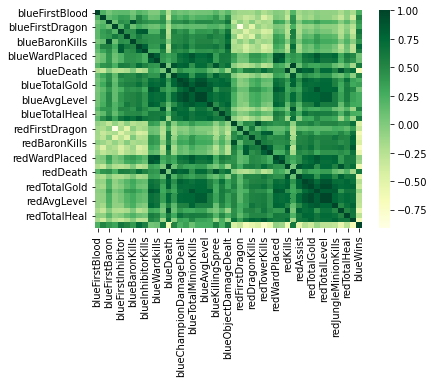

In [128]:
import seaborn as sns
corr = df_Challenger.corr()
sns.heatmap(corr, cmap = 'YlGn');

In [129]:
 sig_corr = corr.loc[abs(corr['blueWins']) >= 0.5]
 sig_corr.index
 for i in sig_corr.index:
     print('The absolute correlation coefficient of Blue Team Wins vs.', i, 'is', abs(sig_corr.loc[i]['blueWins']))

The absolute correlation coefficient of Blue Team Wins vs. blueFirstTower is 0.5211891565593849
The absolute correlation coefficient of Blue Team Wins vs. blueFirstInhibitor is 0.6412787999765784
The absolute correlation coefficient of Blue Team Wins vs. blueDragonKills is 0.5318839413111451
The absolute correlation coefficient of Blue Team Wins vs. blueTowerKills is 0.7327588520385552
The absolute correlation coefficient of Blue Team Wins vs. blueInhibitorKills is 0.5622381897370853
The absolute correlation coefficient of Blue Team Wins vs. blueKills is 0.6163453691668153
The absolute correlation coefficient of Blue Team Wins vs. blueDeath is 0.6075062767145276
The absolute correlation coefficient of Blue Team Wins vs. blueAssist is 0.5261363918412413
The absolute correlation coefficient of Blue Team Wins vs. blueKillingSpree is 0.564462067550781
The absolute correlation coefficient of Blue Team Wins vs. blueObjectDamageDealt is 0.6063150497098887
The absolute correlation coefficient 

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

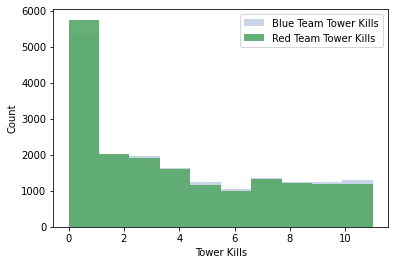

In [131]:
blue_tower_kills = df_Challenger['blueTowerKills']
red_tower_kills = df_Challenger['redTowerKills']

plt.hist(blue_tower_kills, bins = 10, alpha = .3, label='Blue Team Tower Kills');
plt.hist(red_tower_kills, bins = 10, alpha = .9, label='Red Team Tower Kills');
plt.legend(loc='upper right');
plt.xlabel('Tower Kills');
plt.ylabel('Count');

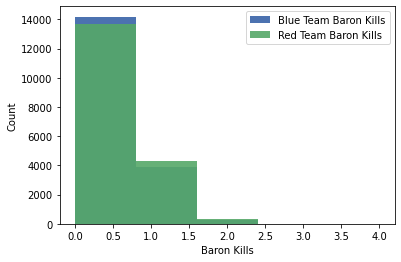

In [132]:
blue_baron_kills = df_Challenger['blueBaronKills']
red_baron_kills = df_Challenger['redBaronKills']

plt.hist(blue_baron_kills, bins = 5, alpha = 1, label='Blue Team Baron Kills');
plt.hist(red_baron_kills, bins = 5, alpha = .9, label='Red Team Baron Kills');
plt.legend(loc='upper right');
plt.xlabel('Baron Kills');
plt.ylabel('Count');

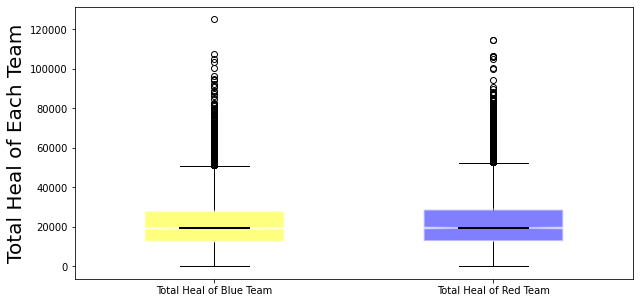

In [133]:
blue_total_heal = df_Challenger.loc[:, 'blueTotalHeal']
red_total_heal = df_Challenger.loc[:, 'redTotalHeal']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
boxplots = axes.boxplot([blue_total_heal, red_total_heal],
                        notch = True,
                        labels = ['Total Heal of Blue Team', 'Total Heal of Red Team'],
                        patch_artist = True,
                        widths = 0.5,
                        medianprops = dict(linestyle='-', linewidth = 2, color='black'),
                        boxprops = dict(linestyle='--', linewidth = 2, color='white', facecolor='blue', alpha = 0.5)
                        );
boxplot1 = boxplots['boxes'][0];
boxplot1.set_facecolor('yellow');
plt.ylabel('Total Heal of Each Team', fontsize = 20);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


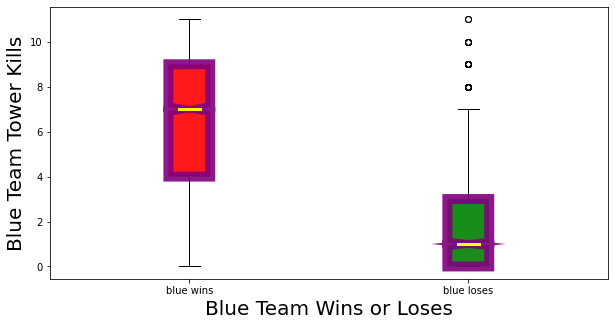

In [134]:
blue_team_wins = df_Challenger.loc[df_Challenger['blueWins'] == 1, 'blueTowerKills']
blue_team_loses = df_Challenger.loc[df_Challenger['blueWins'] == 0, 'blueTowerKills']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (10,5))
boxplots = axes.boxplot([blue_team_wins, blue_team_loses],
                        notch = True,
                        labels = ['blue wins', 'blue loses'],
                        patch_artist = True,
                        medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
                        boxprops = dict(linestyle='---', linewidth=10, color='purple', facecolor = 'green', alpha = 0.9)
                        );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Blue Team Wins or Loses', fontsize=20);
plt.ylabel('Blue Team Tower Kills', fontsize = 20);

#3. Dimensionality Reduction

In [135]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           18360 non-null  int64  
 1   blueFirstTower           18360 non-null  int64  
 2   blueFirstBaron           18360 non-null  int64  
 3   blueFirstDragon          18360 non-null  int64  
 4   blueFirstInhibitor       18360 non-null  int64  
 5   blueDragonKills          18360 non-null  int64  
 6   blueBaronKills           18360 non-null  int64  
 7   blueTowerKills           18360 non-null  int64  
 8   blueInhibitorKills       18360 non-null  int64  
 9   blueWardPlaced           18360 non-null  int64  
 10  blueWardkills            18360 non-null  int64  
 11  blueKills                18360 non-null  int64  
 12  blueDeath                18360 non-null  int64  
 13  blueAssist               18360 non-null  int64  
 14  blueChampionDamageDeal

In [136]:
# There are linear relationships between our features:
    # 1. more blue kills = more red deaths
    # 2. more tower kills = more total gold

In [137]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [138]:
X = df_Challenger.drop(columns = 'blueWins')
y = df_Challenger['blueWins']

In [139]:
X.shape

(18360, 44)

In [140]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [141]:
pca = PCA()
pca.fit(scaled_df)

PCA()

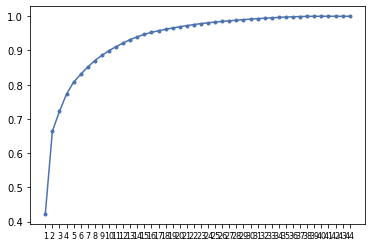

In [142]:
plt.plot(range(1, 45), pca.explained_variance_ratio_.cumsum(), marker = '.')
plt.xticks(ticks = range(1, 45), fontsize = 8);

Text(0, 0.5, 'Proportion of Explained Variance')

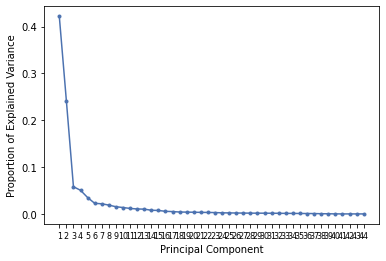

In [143]:
plt.plot(range(1, 45), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 45), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [144]:
pca17 = PCA(n_components=17)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [146]:
from sklearn.pipeline import make_pipeline
transformer = make_pipeline(scaler, pca17)

In [147]:
rf = RandomForestClassifier()
rf_pipe = make_pipeline(transformer, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=17))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [148]:
print('Training accuracy:', rf_pipe.score(X_train, y_train))
print('Testing accuracy:', rf_pipe.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.9888888888888889


#4. Keras with dropout and early stopping

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [150]:
input_shape = X_train.shape[1]
input_shape

44

In [151]:
model = Sequential()

In [152]:
%%time

model.add(Dense(44,
                input_dim = input_shape,
                activation = 'relu'))
model.add(Dense(44,
                activation = 'relu'))
model.add(Dense(1,
                activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'adam')

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100)



Epoch 1/100
431/431 [==============================] - 3s 4ms/step - loss: 77.2520 - val_loss: 29.7813
Epoch 2/100
431/431 [==============================] - 2s 4ms/step - loss: 26.7830 - val_loss: 13.0837
Epoch 3/100
431/431 [==============================] - 2s 4ms/step - loss: 25.9894 - val_loss: 8.6265
Epoch 4/100
431/431 [==============================] - 2s 4ms/step - loss: 13.7603 - val_loss: 5.7919
Epoch 5/100
431/431 [==============================] - 2s 4ms/step - loss: 18.6781 - val_loss: 10.6125
Epoch 6/100
431/431 [==============================] - 2s 4ms/step - loss: 20.3387 - val_loss: 7.3174
Epoch 7/100
431/431 [==============================] - 1s 3ms/step - loss: 22.7702 - val_loss: 5.2586
Epoch 8/100
431/431 [==============================] - 3s 6ms/step - loss: 8.6237 - val_loss: 5.5595
Epoch 9/100
431/431 [==============================] - 2s 4ms/step - loss: 10.6590 - val_loss: 12.7156
Epoch 10/100
431/431 [==============================] - 2s 5ms/step - loss: 8.4

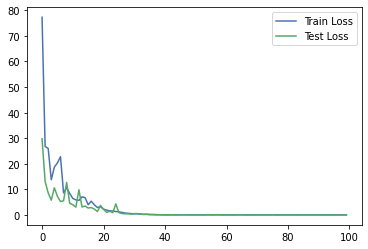

In [153]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend();

it looks pretty good....

dropout might make the model better

early stopping is almost not needed

with dropout and early stopping

Epoch 1/100
431/431 [==============================] - 2s 3ms/step - loss: 277.3662 - val_loss: 12.2057
Epoch 2/100
431/431 [==============================] - 1s 3ms/step - loss: 39.4431 - val_loss: 3.0692
Epoch 3/100
431/431 [==============================] - 1s 3ms/step - loss: 13.2834 - val_loss: 0.5339
Epoch 4/100
431/431 [==============================] - 1s 3ms/step - loss: 5.8267 - val_loss: 0.2952
Epoch 5/100
431/431 [==============================] - 1s 3ms/step - loss: 3.0780 - val_loss: 0.2492
Epoch 6/100
431/431 [==============================] - 1s 2ms/step - loss: 1.7885 - val_loss: 0.2565
Epoch 7/100
431/431 [==============================] - 1s 3ms/step - loss: 1.0772 - val_loss: 0.2373
Epoch 8/100
431/431 [==============================] - 1s 3ms/step - loss: 0.7198 - val_loss: 0.2344
Epoch 9/100
431/431 [==============================] - 1s 2ms/step - loss: 0.7763 - val_loss: 0.2483
Epoch 10/100
431/431 [==============================] - 1s 3ms/step - loss: 0.6715 - v

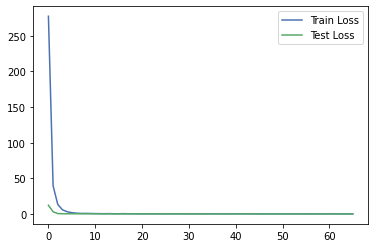

In [154]:
%%time

model2 = Sequential()


model2.add(Dense(44,
                input_dim = input_shape,
                activation = 'relu'))

model2.add(Dropout(.2))

model2.add(Dense(44,
                activation = 'relu'))

model2.add(Dropout(.2))

model2.add(Dense(1,
                activation = 'sigmoid'))

model2.compile(loss = 'bce', optimizer = 'adam')

early_stopping = EarlyStopping(patience = 10)

history2 = model2.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100,
                    callbacks = [early_stopping])

plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Test Loss')
plt.legend();